# Visualization
Load enhanced data, generate plots (histograms, heatmaps, time series, etc.). Plots display inline.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

sns.set_style("whitegrid")

# Load enhanced CSV
enhanced_csv = 'enhanced_stock_data.csv'
if not Path(enhanced_csv).exists():
    raise FileNotFoundError(f"{enhanced_csv} not found. Run data_preprocessing_feature_engineering.ipynb first.")
combined_df = pd.read_csv(enhanced_csv)
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
print(f"Loaded enhanced data: {combined_df.shape}")

Loaded enhanced data: (11130, 12)


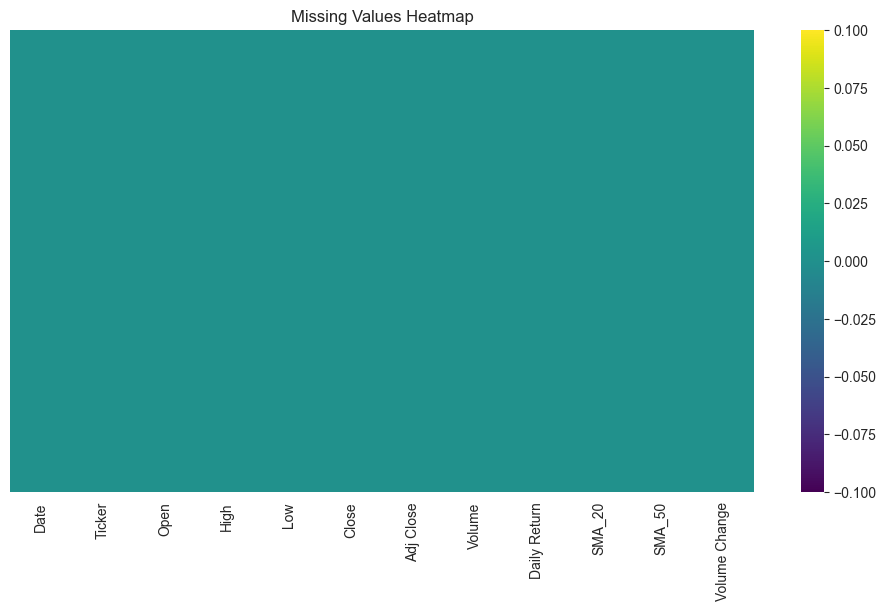

In [2]:
plt.figure(figsize=(12, 6))
sns.heatmap(combined_df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

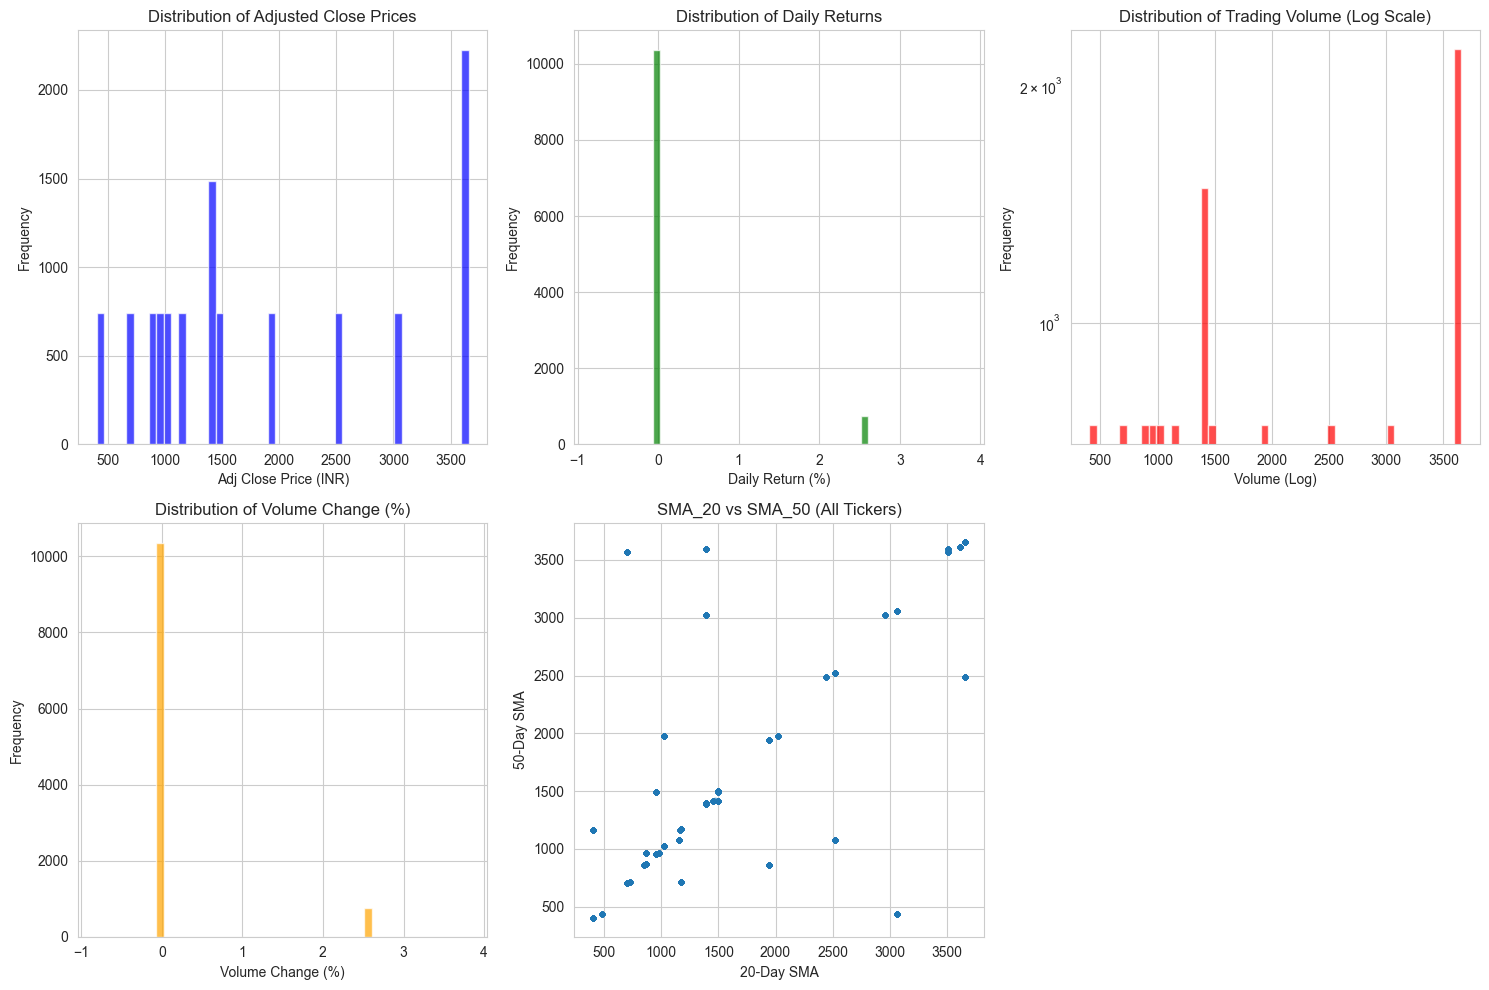

Key Insights: Daily returns are roughly normal (check for skewness). Volumes are right-skewed.


In [3]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
combined_df['Adj Close'].hist(bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Adjusted Close Prices')
plt.xlabel('Adj Close Price (INR)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
combined_df['Daily Return'].hist(bins=50, alpha=0.7, color='green')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
combined_df['Volume'].hist(bins=50, alpha=0.7, color='red', log=True)
plt.title('Distribution of Trading Volume (Log Scale)')
plt.xlabel('Volume (Log)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
combined_df['Volume Change'].hist(bins=50, alpha=0.7, color='orange')
plt.title('Distribution of Volume Change (%)')
plt.xlabel('Volume Change (%)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.scatter(combined_df['SMA_20'], combined_df['SMA_50'], alpha=0.5, s=10)
plt.title('SMA_20 vs SMA_50 (All Tickers)')
plt.xlabel('20-Day SMA')
plt.ylabel('50-Day SMA')

plt.tight_layout()
plt.show()

print("Key Insights: Daily returns are roughly normal (check for skewness). Volumes are right-skewed.")

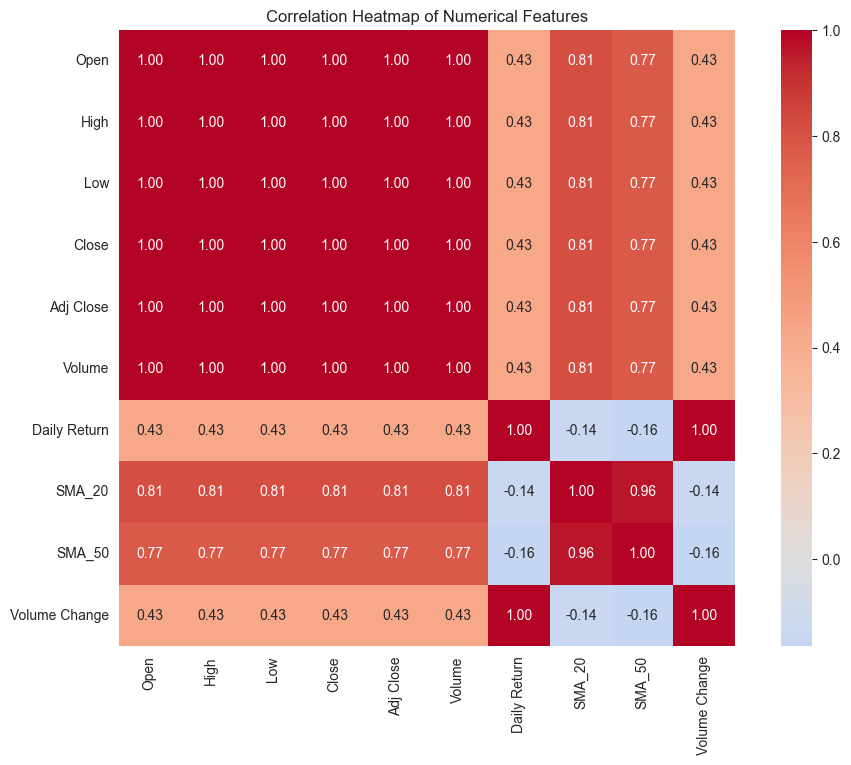

In [4]:
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Return', 'SMA_20', 'SMA_50', 'Volume Change']
corr_matrix = combined_df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

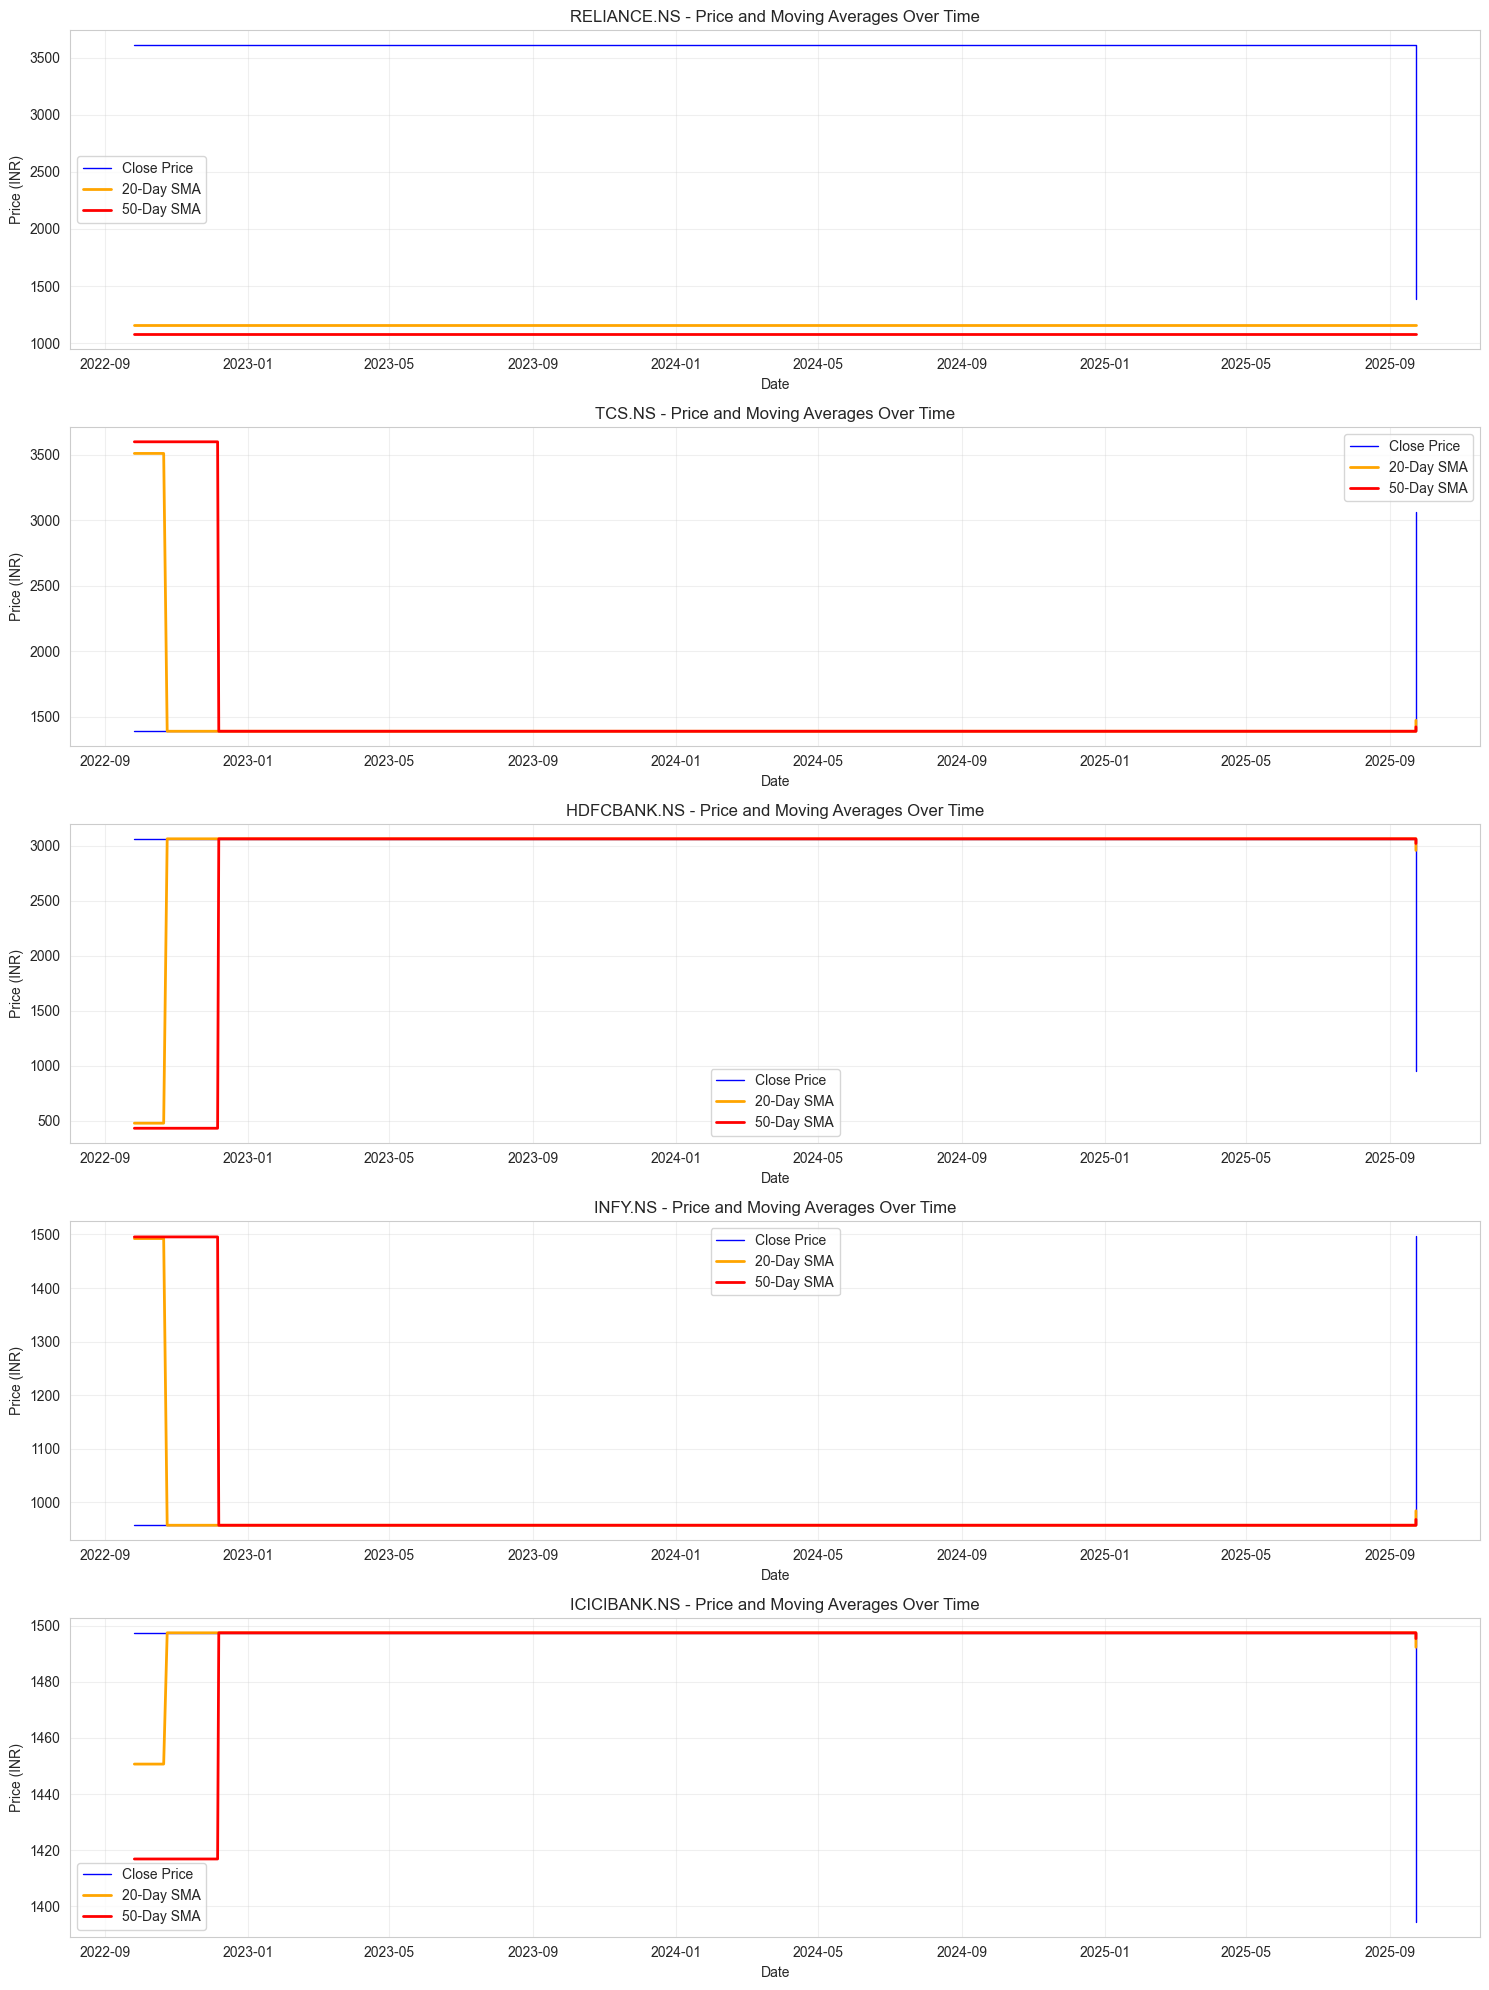

Key Insights: Observe trends, crossovers in SMAs (e.g., golden cross for buy signals).


In [6]:
# Time series plots for Close Prices and Moving Averages (your original Cell 12)
# Define tickers_to_plot (limit to first 5 for brevity; uses full indian_tickers if defined earlier)
if 'indian_tickers' not in locals():
    indian_tickers = [
        "RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "INFY.NS", "ICICIBANK.NS",
        "HINDUNILVR.NS", "SBIN.NS", "ITC.NS", "BHARTIARTL.NS", "LT.NS",
        "TATAMOTORS.NS", "AXISBANK.NS", "BAJFINANCE.NS", "M&M.NS", "ADANIPORTS.NS"
    ]
tickers_to_plot = indian_tickers[:5]  # Plot first 5 tickers; change to indian_tickers for all
fig, axes = plt.subplots(len(tickers_to_plot), 1, figsize=(15, 4*len(tickers_to_plot)))
if len(tickers_to_plot) == 1:
    axes = [axes]  # Handle single subplot

for i, ticker in enumerate(tickers_to_plot):
    ticker_data = combined_df[combined_df['Ticker'] == ticker].sort_values('Date')
    
    axes[i].plot(ticker_data['Date'], ticker_data['Close'], label='Close Price', color='blue', linewidth=1)
    axes[i].plot(ticker_data['Date'], ticker_data['SMA_20'], label='20-Day SMA', color='orange', linewidth=2)
    axes[i].plot(ticker_data['Date'], ticker_data['SMA_50'], label='50-Day SMA', color='red', linewidth=2)
    axes[i].set_title(f'{ticker} - Price and Moving Averages Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price (INR)')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key Insights: Observe trends, crossovers in SMAs (e.g., golden cross for buy signals).")

C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_67608\983122891.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(loc='upper left')


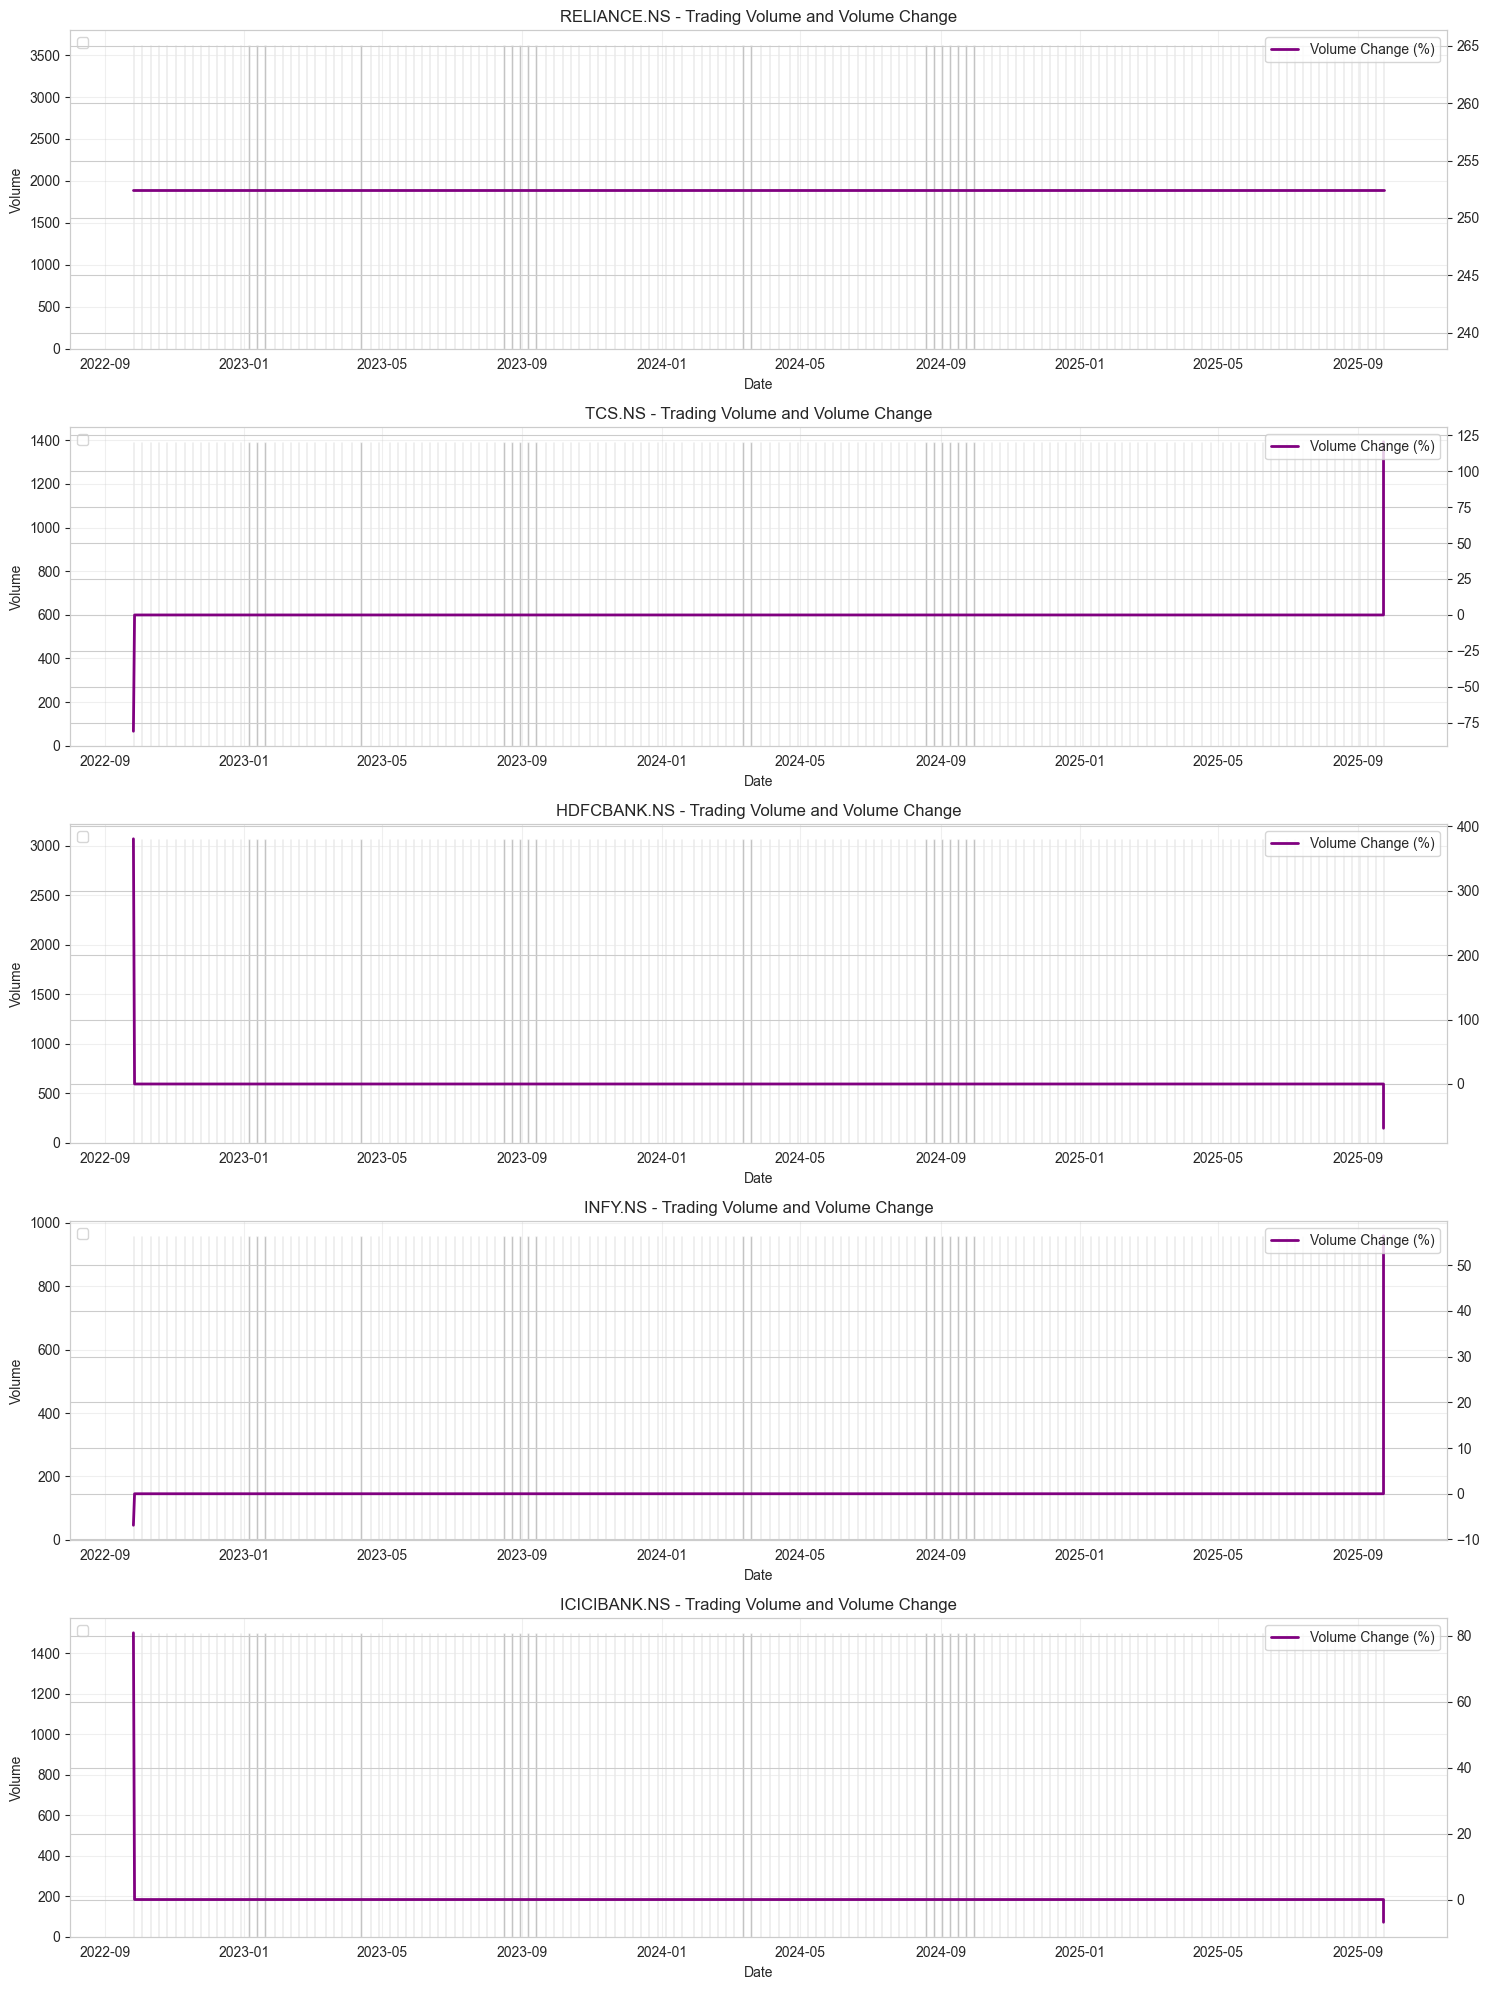

=== Overall Volume Insights ===
                  mean     std     max
Ticker                                
ADANIPORTS.NS  3611.67   79.77  3614.6
AXISBANK.NS     701.98   17.23  1170.8
BAJFINANCE.NS  1170.60    5.33  1170.8
BHARTIARTL.NS   405.27   56.37  1938.7
HDFCBANK.NS    3059.56   77.28  3062.4
HINDUNILVR.NS  1395.82   41.41  2522.2
ICICIBANK.NS   1497.36    3.79  1497.5
INFY.NS         957.93   19.84  1497.5
ITC.NS          869.97   17.16   870.6
LT.NS          1941.02   63.10  3657.6
M&M.NS         1028.99   95.05  3614.6
RELIANCE.NS    3611.60   81.67  3614.6
SBIN.NS        2519.97   60.63  2522.2
TATAMOTORS.NS  3653.62  108.53  3657.6
TCS.NS         1392.05   61.40  3062.4


In [7]:
# Volume trends and Volume Change visualization (your original Cell 14)
tickers_to_plot = indian_tickers[:5]  # First 5
fig, axes = plt.subplots(len(tickers_to_plot), 1, figsize=(15, 4*len(tickers_to_plot)))
if len(tickers_to_plot) == 1:
    axes = [axes]

for i, ticker in enumerate(tickers_to_plot):
    ticker_data = combined_df[combined_df['Ticker'] == ticker].sort_values('Date')
    
    # Bar plot for volume (subsample every 5th point to avoid overcrowding)
    dates_sample = ticker_data['Date'][::5]
    volumes_sample = ticker_data['Volume'][::5]
    axes[i].bar(dates_sample, volumes_sample, alpha=0.6, color='gray', width=1)
    
    # Line for volume change (full data, in %)
    ax2 = axes[i].twinx()
    ax2.plot(ticker_data['Date'], ticker_data['Volume Change'] * 100, label='Volume Change (%)', color='purple', linewidth=2)
    
    axes[i].set_title(f'{ticker} - Trading Volume and Volume Change')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Volume')
    axes[i].legend(loc='upper left')
    ax2.legend(loc='upper right')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Overall volume summary (text output)
print("=== Overall Volume Insights ===")
print(combined_df.groupby('Ticker')['Volume'].agg(['mean', 'std', 'max']).round(2))

C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_67608\983038656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Ticker', y='Daily Return', palette='Set2')


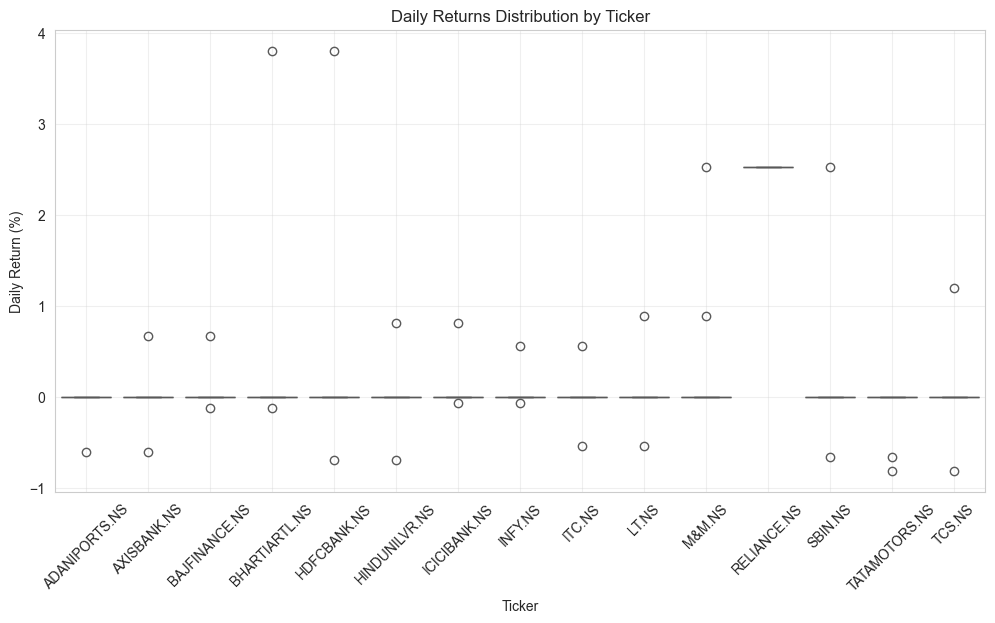

=== Daily Returns Summary by Ticker ===
                 mean    std     min     max
Ticker                                      
ADANIPORTS.NS   -0.08   2.21  -60.12    0.00
AXISBANK.NS      0.01   3.31  -60.12   66.94
BAJFINANCE.NS    0.07   2.50  -12.41   66.94
BHARTIARTL.NS    0.50  13.99  -12.41  380.83
HDFCBANK.NS      0.42  14.21  -68.74  380.83
HINDUNILVR.NS    0.02   3.90  -68.74   80.89
ICICIBANK.NS     0.10   2.98   -6.89   80.89
INFY.NS          0.07   2.09   -6.89   56.45
ITC.NS           0.00   2.86  -53.69   56.45
LT.NS            0.05   3.81  -53.69   88.66
M&M.NS           0.46   9.82    0.00  252.47
RELIANCE.NS    252.47   0.00  252.47  252.47
SBIN.NS          0.25   9.58  -65.48  252.47
TATAMOTORS.NS   -0.20   3.82  -80.82    0.00
TCS.NS           0.05   5.33  -80.82  120.35

Key Insights: Compare volatility (std) and average returns across stocks.


In [8]:
# Comparative box plots for Daily Returns across tickers (your original Cell 15)
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x='Ticker', y='Daily Return', palette='Set2')
plt.title('Daily Returns Distribution by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Daily Return (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# Summary stats for returns per ticker (text output)
print("=== Daily Returns Summary by Ticker ===")
returns_summary = combined_df.groupby('Ticker')['Daily Return'].agg(['mean', 'std', 'min', 'max']).round(4) * 100
print(returns_summary)
print("\nKey Insights: Compare volatility (std) and average returns across stocks.")

C:\Users\Sanskaar chauhan\AppData\Local\Temp\ipykernel_67608\508032722.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  }).resample('M').mean()  # Monthly resampling


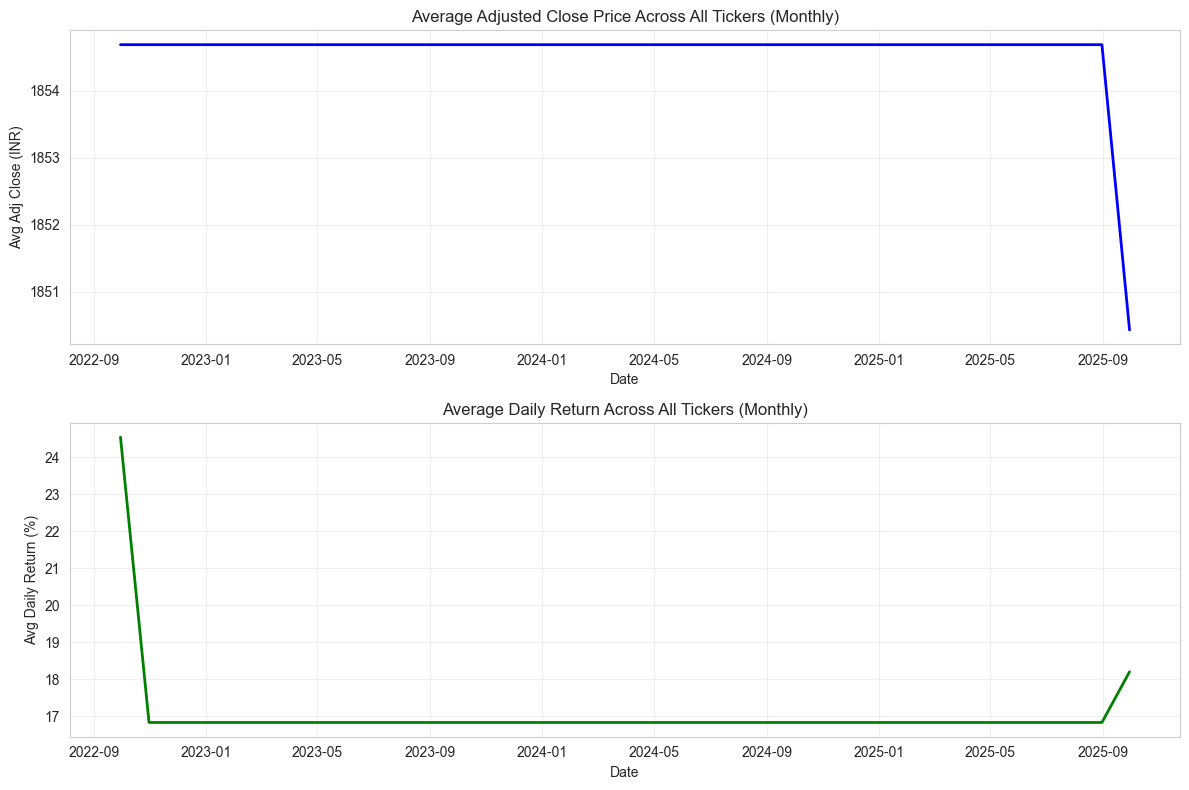

Key Insights: Overall market uptrend/downtrend? Seasonal patterns?


In [9]:
# Aggregated market trends (e.g., average close price and returns over time) (your original Cell 16)
# Resample to monthly averages for smoother plot
monthly_avg = combined_df.groupby('Date').agg({
    'Adj Close': 'mean',
    'Daily Return': 'mean',
    'Volume': 'mean'
}).resample('M').mean()  # Monthly resampling

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Average Close Price over time
ax1.plot(monthly_avg.index, monthly_avg['Adj Close'], color='blue', linewidth=2)
ax1.set_title('Average Adjusted Close Price Across All Tickers (Monthly)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Adj Close (INR)')
ax1.grid(True, alpha=0.3)

# Average Daily Return over time
ax2.plot(monthly_avg.index, monthly_avg['Daily Return'] * 100, color='green', linewidth=2)
ax2.set_title('Average Daily Return Across All Tickers (Monthly)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Avg Daily Return (%)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key Insights: Overall market uptrend/downtrend? Seasonal patterns?")